In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16.0,9.0)

In [2]:
with open('data/ao_monthly.txt') as f:
    for x in range(20):
        print(next(f))

 1950    1  -0.60310E-01

 1950    2   0.62681E+00

 1950    3  -0.81275E-02

 1950    4   0.55510E+00

 1950    5   0.71577E-01

 1950    6   0.53857E+00

 1950    7  -0.80248E+00

 1950    8  -0.85101E+00

 1950    9   0.35797E+00

 1950   10  -0.37890E+00

 1950   11  -0.51511E+00

 1950   12  -0.19281E+01

 1951    1  -0.84969E-01

 1951    2  -0.39993E+00

 1951    3  -0.19341E+01

 1951    4  -0.77648E+00

 1951    5  -0.86278E+00

 1951    6  -0.91786E+00

 1951    7   0.90023E-01

 1951    8  -0.37741E+00



In [3]:
df = pd.read_fwf('data/ao_monthly.txt',header=None)
df

,0,1,2
0,1950,1,-0.060310
1,1950,2,0.626810
2,1950,3,-0.008127
3,1950,4,0.555100
4,1950,5,0.071577
...,...,...,...
793,2016,2,-0.023521
794,2016,3,0.280240
795,2016,4,-1.051100
796,2016,5,-0.035739


In [4]:
df = pd.read_fwf('data/ao_monthly.txt',header=None,parse_dates=[[0,1]])
df

,0_1,2
0,1950-01-01,-0.060310
1,1950-02-01,0.626810
2,1950-03-01,-0.008127
3,1950-04-01,0.555100
4,1950-05-01,0.071577
...,...,...
793,2016-02-01,-0.023521
794,2016-03-01,0.280240
795,2016-04-01,-1.051100
796,2016-05-01,-0.035739


In [5]:
df.columns = ['Month','Value']
df = df.set_index('Month')

In [6]:
df.head(10)

,Value
Month,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008127
1950-04-01,0.555100
1950-05-01,0.071577
1950-06-01,0.538570
1950-07-01,-0.802480
1950-08-01,-0.851010
1950-09-01,0.357970


In [7]:
min(df.index)

Timestamp('1950-01-01 00:00:00')

In [8]:
max(df.index)

Timestamp('2016-06-01 00:00:00')

In [9]:
df = pd.DataFrame({'year':[2022,2021],'month':[2,3],'day':[1,2],'hour':[14,15]})
df

,year,month,day,hour
0,2022,2,1,14
1,2021,3,2,15


# Resampling

In [12]:
rng = pd.date_range('24/08/2022',periods=72,freq='H')
ts_pd = pd.Series(np.random.randn(len(rng)),index=rng)
ts_pd.head()

C:\Users\barry\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: UserWarning: Parsing '24/08/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


2022-08-24 00:00:00   -0.599637
2022-08-24 01:00:00   -1.649656
2022-08-24 02:00:00    1.730677
2022-08-24 03:00:00   -0.100109
2022-08-24 04:00:00   -0.803494
Freq: H, dtype: float64

In [17]:
#backfill is a lookahead
ts_pd.asfreq('45Min',method='bfill').head(10)

2022-08-24 00:00:00   -0.599637
2022-08-24 00:45:00   -1.649656
2022-08-24 01:30:00    1.730677
2022-08-24 02:15:00   -0.100109
2022-08-24 03:00:00   -0.100109
2022-08-24 03:45:00   -0.803494
2022-08-24 04:30:00    0.375593
2022-08-24 05:15:00    0.107241
2022-08-24 06:00:00    0.107241
2022-08-24 06:45:00   -0.103526
Freq: 45T, dtype: float64

In [18]:
#backfill is a lookahead
ts_pd.asfreq('45Min',method='ffill').head(10)

2022-08-24 00:00:00   -0.599637
2022-08-24 00:45:00   -0.599637
2022-08-24 01:30:00   -1.649656
2022-08-24 02:15:00    1.730677
2022-08-24 03:00:00   -0.100109
2022-08-24 03:45:00   -0.100109
2022-08-24 04:30:00   -0.803494
2022-08-24 05:15:00    0.375593
2022-08-24 06:00:00    0.107241
2022-08-24 06:45:00    0.107241
Freq: 45T, dtype: float64

In [21]:
#backfill is a lookahead
ts_pd.asfreq('45Min',method=None).fillna(0).head(10)

2022-08-24 00:00:00   -0.599637
2022-08-24 00:45:00    0.000000
2022-08-24 01:30:00    0.000000
2022-08-24 02:15:00    0.000000
2022-08-24 03:00:00   -0.100109
2022-08-24 03:45:00    0.000000
2022-08-24 04:30:00    0.000000
2022-08-24 05:15:00    0.000000
2022-08-24 06:00:00    0.107241
2022-08-24 06:45:00    0.000000
Freq: 45T, dtype: float64

In [51]:
#backfill is a lookahead
ts_pd.asfreq('5H',method='ffill')

2022-08-24 00:00:00   -0.599637
2022-08-24 05:00:00    0.375593
2022-08-24 10:00:00   -0.280018
2022-08-24 15:00:00    0.610058
2022-08-24 20:00:00   -0.235501
2022-08-25 01:00:00   -1.458748
2022-08-25 06:00:00   -0.937361
2022-08-25 11:00:00   -0.415432
2022-08-25 16:00:00    2.499653
2022-08-25 21:00:00    0.426921
2022-08-26 02:00:00    1.351131
2022-08-26 07:00:00   -0.060662
2022-08-26 12:00:00   -0.483816
2022-08-26 17:00:00    0.790815
2022-08-26 22:00:00   -0.205722
Freq: 5H, dtype: float64

In [50]:
ts_pd.resample('D').mean()

2022-08-24   -0.071827
2022-08-25    0.153178
2022-08-26    0.075319
Freq: D, dtype: float64

In [37]:
ts_pd.resample('D').var()

2022-08-24    1.004698
2022-08-25    1.048012
2022-08-26    0.916781
Freq: D, dtype: float64

In [47]:
ts_pd.resample('D').apply(lambda x: np.sin(x[0]))

2022-08-24   -0.564343
2022-08-25    0.616011
2022-08-26    0.187237
Freq: D, dtype: float64

<AxesSubplot:>

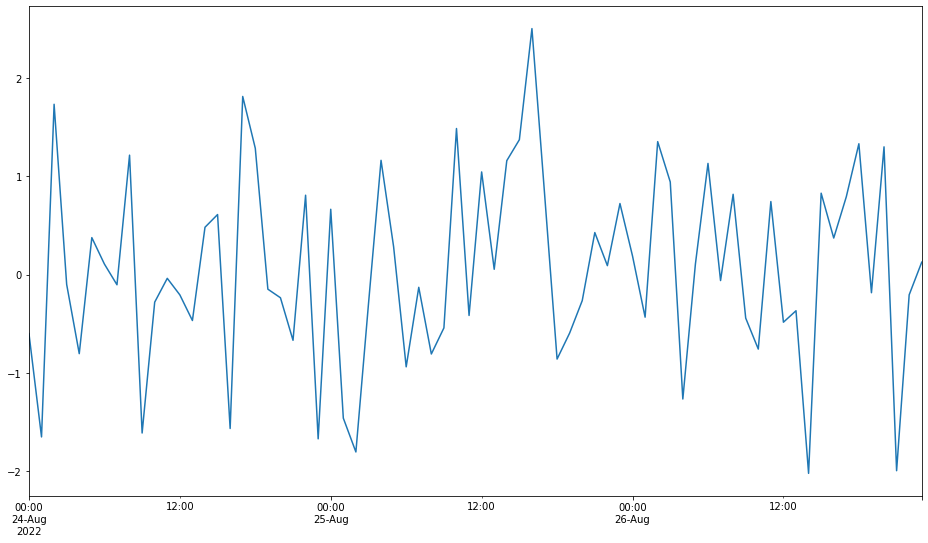

In [52]:
ts_pd.plot()